In [11]:
import torch
import torchvision
from torchvision.io import read_video
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import numpy as np
import time

Test video link:
https://www.pexels.com/video/book-titled-flames-of-life-2308576/

In [2]:
!pip install av

In [3]:
class VideoDataset(Dataset):
    def __init__(self, dataset_len, video_paths, labels, read_video_kwargs):
      self.dataset_len = dataset_len
      self.video_paths = video_paths
      self.labels = labels
      self.read_video_kwargs = read_video_kwargs

    def __len__(self):
      return self.dataset_len

    def __getitem__(self, idx):
      video, _, _ = read_video(self.video_paths[idx], **self.read_video_kwargs)
      label = self.labels[idx]
      return video, label

In [4]:
dataset_len = 1
video_paths = ["/content/2308576-hd_1920_1080_30fps.mp4"]
labels = ["example"]

read_video_kwargs = {
    "pts_unit": "sec",
    "end_pts": 3,
    "output_format": "TCHW"
}

In [5]:
video_dataset = VideoDataset(dataset_len, video_paths, labels, read_video_kwargs)

In [6]:
dataloader = DataLoader(video_dataset, batch_size=64)

In [7]:
video, label = next(iter(dataloader))

In [8]:
video.shape

torch.Size([1, 90, 3, 1080, 1920])

In [9]:
label

('example',)

In [15]:
def display_images_from_tensor(video_tensor, num_images=30):
    assert len(video_tensor.shape) == 4, "Tensor should have shape (T, C, H, W)"

    T, C, H, W = video_tensor.shape

    num_images = min(num_images, T)

    fig, axes = plt.subplots(5, 6, figsize=(15, 10))
    axes = axes.flatten()

    for i in range(num_images):
        frame = video_tensor[i].permute(1, 2, 0).numpy()

        ax = axes[i]
        ax.imshow(frame)
        ax.axis('off')

    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

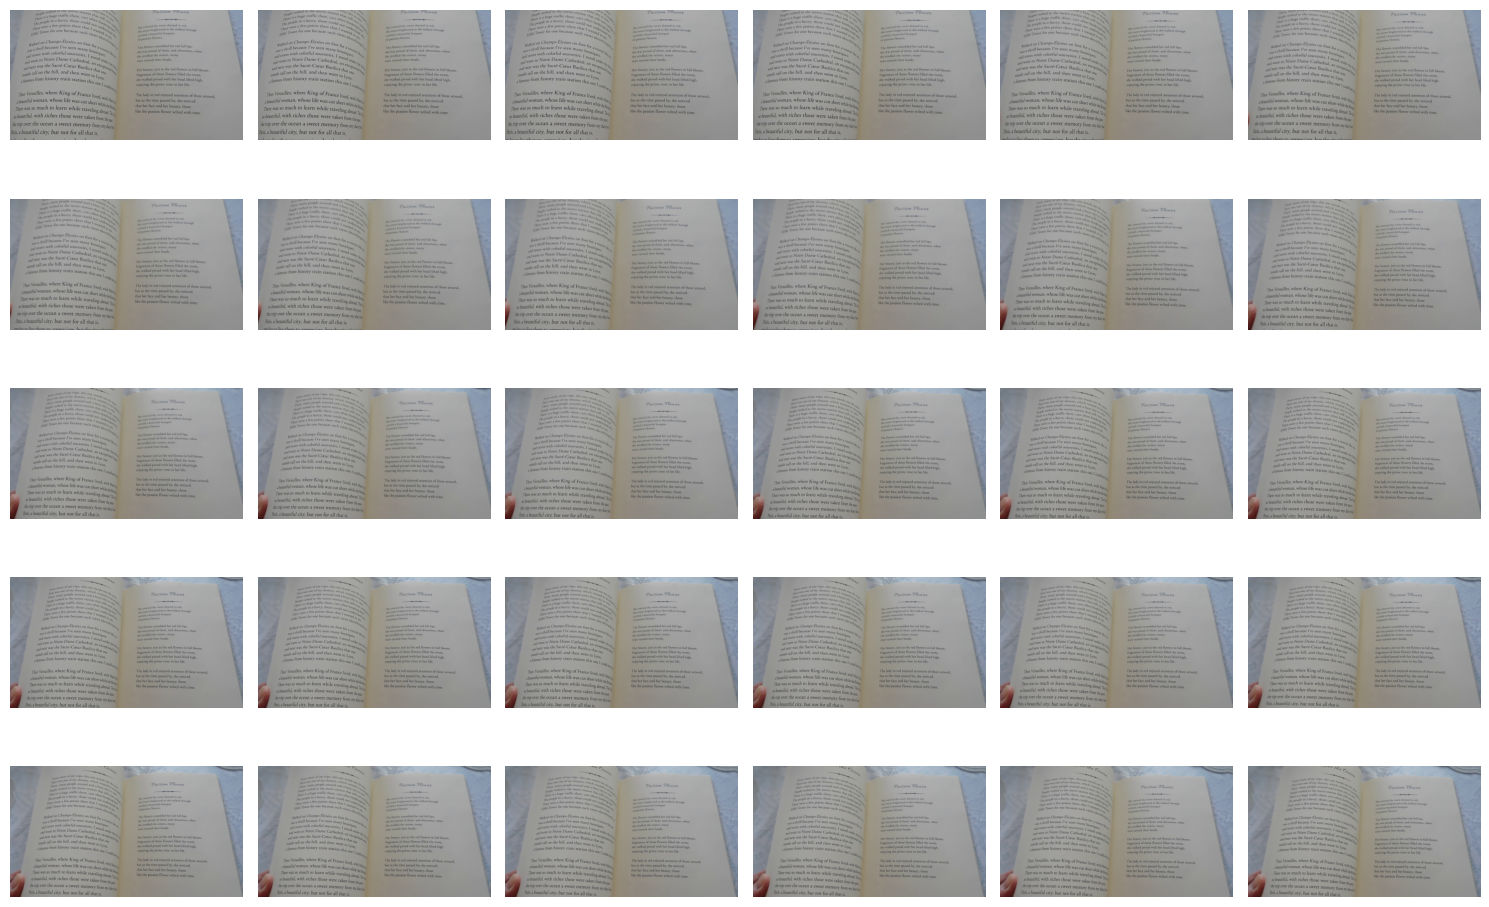

In [16]:
display_images_from_tensor(video.squeeze(0))